<a href="https://colab.research.google.com/github/dvguruprasad/colab-wip/blob/main/vectorizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
import pandas as pd


# set of documents
train = ['The sky is blue.','The sun is bright.']
test = ['The sun in the sky is bright', 'We can see the shining sun, the bright sun.']
# instantiate the vectorizer object
countvectorizer = CountVectorizer(analyzer= 'word', stop_words='english')
tfidfvectorizer = TfidfVectorizer(analyzer='word',stop_words= 'english')

# convert th documents into a matrix
count_wm = countvectorizer.fit_transform(train)
tfidf_wm = tfidfvectorizer.fit_transform(train)


#count_tokens = tfidfvectorizer.get_feature_names() # no difference
count_tokens = countvectorizer.get_feature_names()
tfidf_tokens = tfidfvectorizer.get_feature_names()
df_countvect = pd.DataFrame(data = count_wm.toarray(),index = ['Doc1','Doc2'],columns = count_tokens)
df_tfidfvect = pd.DataFrame(data = tfidf_wm.toarray(),index = ['Doc1','Doc2'],columns = tfidf_tokens)

print("Count Vectorizer\n")
print(df_countvect)
print("\nTD-IDF Vectorizer\n")
print(df_tfidfvect)

In [ ]:
# set of documents
train = ['The sky is blue.','The sun is bright.']
test = ['The sun in the sky is bright', 'We can see the shining sun, the bright sun.']
# instantiate the vectorizer object
countvectorizer = CountVectorizer(analyzer= 'word', stop_words='english')
tfidfvectorizer = TfidfVectorizer(analyzer='word',stop_words= 'english')

In [ ]:
# convert th documents into a matrix
count_wm = countvectorizer.fit_transform(train)
tfidf_wm = tfidfvectorizer.fit_transform(train)

In [ ]:
count_wm

<2x4 sparse matrix of type '<class 'numpy.int64'>'
	with 4 stored elements in Compressed Sparse Row format>

In [ ]:
tfidf_wm

<2x4 sparse matrix of type '<class 'numpy.float64'>'
	with 4 stored elements in Compressed Sparse Row format>

In [ ]:
#count_tokens = tfidfvectorizer.get_feature_names() # no difference
count_tokens = countvectorizer.get_feature_names()
tfidf_tokens = tfidfvectorizer.get_feature_names()
df_countvect = pd.DataFrame(data = count_wm.toarray(),index = ['Doc1','Doc2'],columns = count_tokens)
df_tfidfvect = pd.DataFrame(data = tfidf_wm.toarray(),index = ['Doc1','Doc2'],columns = tfidf_tokens)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print("Count Vectorizer\n")
print(df_countvect)
print("\nTD-IDF Vectorizer\n")
print(df_tfidfvect)

Count Vectorizer

      blue  bright  sky  sun
Doc1     1       0    1    0
Doc2     0       1    0    1

TD-IDF Vectorizer

          blue    bright       sky       sun
Doc1  0.707107  0.000000  0.707107  0.000000
Doc2  0.000000  0.707107  0.000000  0.707107


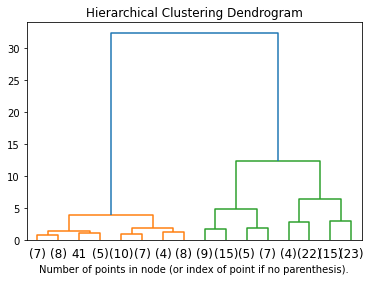

In [ ]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


iris = load_iris()
X = iris.data

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [ ]:
import os, json
import pandas as pd
path_to_json = '/content/1080/'
json_1080 = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]



In [ ]:
path_to_json = '/content/663/'
json_663 = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]

In [ ]:
def read_json(input_file_path):
  with open(input_file_path, "r") as f:
    return json.load(f)

In [ ]:
texts_hcl = [read_json(path_to_json + jf)["text"] for jf in json_663]

In [ ]:
texts_bb = [read_json(path_to_json + jf)["text"] for jf in json_1080]

In [54]:
import csv 

all_data=[]
with open('/content/query_result_2022-08-24T07_22_23.39294Z.csv', mode='r') as csv_file:
  csv_reader = csv.DictReader(csv_file)
  for row in csv_reader:
    all_data.append(row)
  all_data = all_data[1:]

all = [i['data'] for i in all_data]
not_recommended = [i['data'] for i in all_data if i['recommendation'] == 'Not Recommended']
recommended = [i['data'] for i in all_data if i['recommendation'] == 'Recommended']

corpus = all

import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')


stemmer = PorterStemmer()

def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

doc_sample = corpus[0]
print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

processed_docs = [preprocess(doc) for doc in corpus]

corpus = [' '.join(d) for d in processed_docs]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


original document: 
['', 'with', 'warehouse', 'management', 'systems', 'such', 'as', "let's", 'see', 'the', 'RF', 'scanners', "I've", 'used', 'them', 'for', 'over', 'a', 'year', "I've", 'had', 'plenty', 'of', 'experience', "I've", 'been', 'trained', 'to', 'do', 'most', 'of', 'the', 'functions', 'on', 'them', 'other', 'than', 'like', 'some', 'of', 'the', 'more', 'complicated', 'ones', 'most', 'of', 'the', 'functions', 'our', 'church', 'I', 'was', 'trained', 'on', 'with', 'RF', 'scanner', 'were', 'moving', '', 'from', 'one', 'slide', 'to', 'another', 'and', 'or', 'cakey', 'in', 'receiving', 'items', 'and', 'moving', 'them', 'to', 'pallet', 'slots', 'or', 'inputting', 'from', 'a', 'palette', 'slot', 'to', 'a', 'pixel', 'lat', 'my', 'Initiative', 'for', 'learning', 'something', 'new', 'was', 'the', 'simple', 'fact', 'of', '', 'anything', 'I', 'try', 'to', 'learn', 'something', 'new', 'to', 'me', 'I', 'look', 'at', 'it', 'and', 'think', 'about', 'what', 'I', 'can', 'use', 'it', 'for', 'in',

In [38]:
import csv 

all_data=[]
with open('/content/query_result_2022-08-24T07_22_23.39294Z.csv', mode='r') as csv_file:
  csv_reader = csv.DictReader(csv_file)
  for row in csv_reader:
    all_data.append(row)
  all_data = all_data[1:]

all = [i['data'] for i in all_data]
not_recommended = [i['data'] for i in all_data if i['recommendation'] == 'Not Recommended']
recommended = [i['data'] for i in all_data if i['recommendation'] == 'Recommended']

corpus = all


number of documents 2809, number train: 1873, number test: 936


In [56]:
c = len(corpus)
train = corpus
test = corpus[:int(c/3)]
print(f"number of documents {c}, number train: {len(train)}, number test: {len(test)}")

number of documents 2809, number train: 2809, number test: 936


In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
import pandas as pd
import nltk
import re
nltk.download('punkt')
from nltk import regexp_tokenize
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

speacial_characters_pattern = re.compile('^["+-@_!#$%^&*()<>?/\|}{~:]$')
def tokenize(text):
  tokens = regexp_tokenize(text, pattern=r"\s|[\.,;\d\$\%']", gaps=True)
  stems = []
  for item in tokens:
      if not speacial_characters_pattern.search(item):
        stems.append(stemmer.stem(item))
  return stems

# set of documents
#train = texts_hcl
#test = texts_bb
# instantiate the vectorizer object

tfidfvectorizer = TfidfVectorizer(analyzer='word')

# convert th documents into a matrix
tfidf_wm = tfidfvectorizer.fit_transform(train)


#count_tokens = tfidfvectorizer.get_feature_names() # no difference
tfidf_tokens = tfidfvectorizer.get_feature_names()
df_tfidfvect = pd.DataFrame(data = tfidf_wm.toarray(),columns = tfidf_tokens)

print("\nTD-IDF Vectorizer\n")
print(df_tfidfvect)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!



TD-IDF Vectorizer

      aang  aarhu  aaron  ababa  abaddon  abalon  abandon  abba  abbi  \
0      0.0    0.0    0.0    0.0      0.0     0.0      0.0   0.0   0.0   
1      0.0    0.0    0.0    0.0      0.0     0.0      0.0   0.0   0.0   
2      0.0    0.0    0.0    0.0      0.0     0.0      0.0   0.0   0.0   
3      0.0    0.0    0.0    0.0      0.0     0.0      0.0   0.0   0.0   
4      0.0    0.0    0.0    0.0      0.0     0.0      0.0   0.0   0.0   
...    ...    ...    ...    ...      ...     ...      ...   ...   ...   
2804   0.0    0.0    0.0    0.0      0.0     0.0      0.0   0.0   0.0   
2805   0.0    0.0    0.0    0.0      0.0     0.0      0.0   0.0   0.0   
2806   0.0    0.0    0.0    0.0      0.0     0.0      0.0   0.0   0.0   
2807   0.0    0.0    0.0    0.0      0.0     0.0      0.0   0.0   0.0   
2808   0.0    0.0    0.0    0.0      0.0     0.0      0.0   0.0   0.0   

      abbrevi  ...  zone  zoo  zoolog      zoom  zoomer  zoomi  zozo  zumba  \
0         0.0  ...   0.0

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [7]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    return dendrogram(linkage_matrix, **kwargs)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Agglomerative cluster distances [ 0.          0.          0.         ... 11.94465643 17.99353697
 21.13368878]
Agglomerative cluster children [[ 8789 11524]
 [ 1242  1417]
 [ 3237 11723]
 ...
 [23431 23438]
 [23439 23440]
 [23437 23441]]
Agglomerative cluster labels [23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 4, 95, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 15, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 15, 23, 23, 23, 23, 23, 23, 23, 4, 23, 23, 23, 15, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 4, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 15, 23, 4, 23, 23, 23, 103, 23, 23, 23, 23, 23, 23, 15, 23, 23, 23, 23, 23, 15, 4, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 4, 23, 23, 23, 23, 23, 23, 15, 15, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 15, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 15, 23, 23, 23, 23, 23, 23, 23, 23, 23, 1

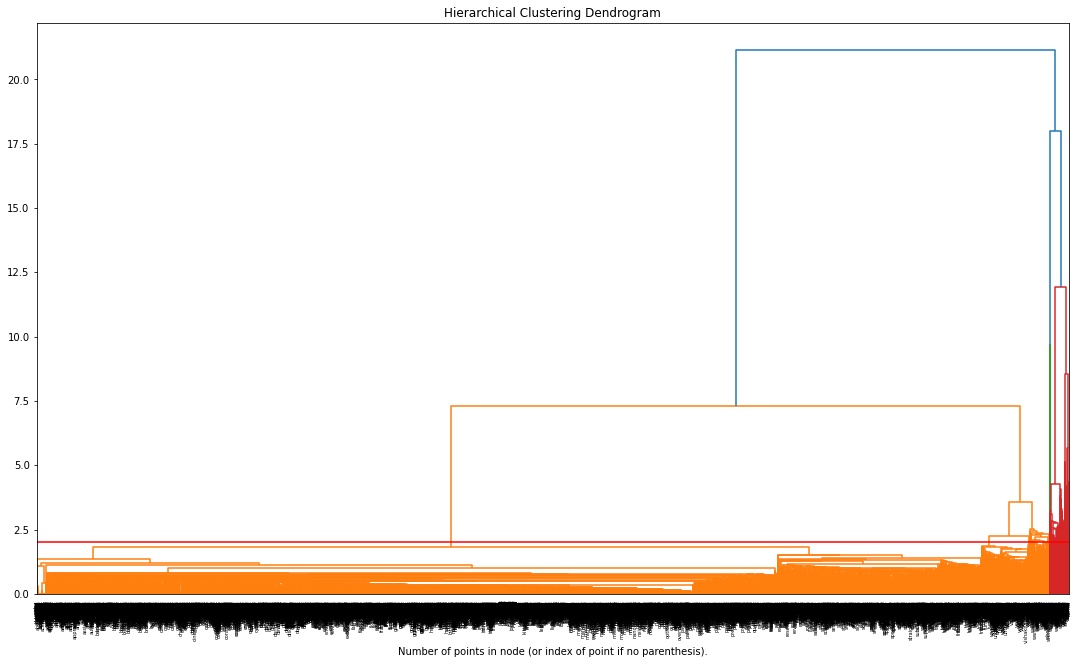

In [62]:
import matplotlib

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=2, n_clusters=None, compute_distances=True)
model = model.fit(df_tfidfvect.transpose())
labels = tfidfvectorizer.get_feature_names()

print("Agglomerative cluster distances %s" % model.distances_)
print("Agglomerative cluster children %s" % model.children_)
# print("Agglomerative cluster feature_names_in_ %s" % model.feature_names_in_)
# print("Agglomerative cluster length feature_names_in_ %s" % len(model.feature_names_in_))

all_labels = [l for l in model.labels_]
print(f"Agglomerative cluster labels {all_labels}")
print("Agglomerative cluster no. of clusters %s" % model.n_clusters_)

cluster_labels = [(cluster, label) for cluster, label in zip(all_labels, labels)]
cluster  = [cl for cl in cluster_labels if cl[0] == 40]
print(f"100 terms from cluster: {cluster[:100]}")

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)

plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
R = plot_dendrogram(model, no_plot=True, p=6)

temp = {R["leaves"][ii]: labels[ii] for ii in range(len(R["leaves"]))}
def llf(xx):
    return "{}".format(temp[xx])

plot_dendrogram(model, leaf_label_func=llf, p=6)
plt.axhline(y = 2, color = 'r', linestyle = '-')
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()